<a href="https://colab.research.google.com/github/Rahmaatef2001/W2022/blob/main/Classification_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Zahra Khaled

ID: 49-5956

Tutorial: T-08

---

Name: Rahma Atef

ID: 49-12703

Tutorial: T-08

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [969]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [970]:
df.info()
#needed to know the data type for each attribute to know which need to be changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

## Data Cleaning

In [971]:
df=df.drop(['customerID'], axis=1)
df
#DROPPING CUSTOMER ID SINCE WE DONT NEED IT FOR OUR ANALYSIS as its a unique number for each employee

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,$84.8/m,$1990.5,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),$103.2/m,$7362.9,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,$29.6/m,$346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,$74.4/m,$306.6,Yes


In [972]:
df.isnull().values.any()
#checking if we have null values

True

In [973]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

In [974]:
df.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [975]:
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [976]:
df['MultipleLines'] = df['MultipleLines'].replace(['No phone service'], 'No')

In [977]:
df.MultipleLines.unique()

array(['No', 'Yes'], dtype=object)

In [978]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [979]:
df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [980]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace(['No internet service'], 'No')

In [981]:
df.OnlineSecurity.unique()

array(['No', 'Yes'], dtype=object)

In [982]:
df.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [983]:
df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [984]:
df['OnlineBackup'] = df['OnlineBackup'].replace(['No internet service'], 'No')

In [985]:
df.OnlineBackup.unique()

array(['Yes', 'No'], dtype=object)

In [986]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [987]:
df.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [988]:
df['DeviceProtection'] = df['DeviceProtection'].replace(['No internet service'], 'No')

In [989]:
df.DeviceProtection.unique()

array(['No', 'Yes'], dtype=object)

In [990]:
df.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [991]:
df['TechSupport'] = df['TechSupport'].replace(['No internet service'], 'No')

In [992]:
df.TechSupport.unique()

array(['No', 'Yes'], dtype=object)

In [993]:
df.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [994]:
df['StreamingTV'] = df['StreamingTV'].replace(['No internet service'], 'No')

In [995]:
df.StreamingTV.unique()

array(['No', 'Yes'], dtype=object)

In [996]:
df.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [997]:
df['StreamingMovies'] = df['StreamingMovies'].replace(['No internet service'], 'No')

In [998]:
df.StreamingMovies.unique()

array(['No', 'Yes'], dtype=object)

In [999]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [1000]:
df.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [1001]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [1002]:
df.MonthlyCharges.isnull().values.any()

False

In [1003]:
df.MonthlyCharges.unique()
df.MonthlyCharges.isnull()
#checking if monthly charges has any null values

0       False
1       False
2       False
3       False
4       False
        ...  
7027    False
7028    False
7029    False
7030    False
7031    False
Name: MonthlyCharges, Length: 7032, dtype: bool

In [1004]:
df.MonthlyCharges.unique()

array(['$29.85/m', '$56.95/m', '$53.85/m', ..., '$63.1/m', '$44.2/m',
       '$78.7/m'], dtype=object)

In [1005]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.extract('([0,-99999999999999]+)', expand=False).str.strip()

In [1006]:
df['MonthlyCharges']=df.MonthlyCharges.str.extract('(^\d*)')

In [1007]:
df.MonthlyCharges.unique()

array(['29', '56', '53', '42', '70', '99', '89', '104', '49', '18', '100',
       '103', '105', '113', '20', '106', '55', '90', '39', '19', '59',
       '30', '64', '96', '95', '66', '45', '69', '74', '97', '79', '76',
       '84', '80', '108', '24', '107', '54', '94', '75', '78', '111',
       '110', '25', '50', '62', '33', '82', '21', '98', '57', '91', '31',
       '85', '88', '23', '58', '35', '44', '71', '101', '68', '86', '73',
       '81', '51', '109', '112', '102', '46', '93', '65', '48', '40',
       '83', '115', '114', '41', '61', '60', '67', '72', '87', '92',
       '116', '43', '28', '63', '47', '34', '26', '52', '77', '36', '38',
       '118', '117', '22', '37'], dtype=object)

In [1008]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)

In [1009]:
df.TotalCharges.isnull().values.any()

True

In [1010]:
df['TotalCharges'] = df['TotalCharges'].str.extract('([0,-99999999999999]+)', expand=False).str.strip()

In [1011]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [1012]:
df.TotalCharges.unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [1013]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [1014]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [1015]:
df.TotalCharges.isnull().values.any()

False

In [1016]:
df.gender.isnull().values.any()

False

In [1017]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [1018]:
df.SeniorCitizen.isnull().values.any()

False

In [1019]:
df.SeniorCitizen.unique()

array([0, 1])

In [1020]:
df.Partner.isnull().values.any()

False

In [1021]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [1022]:
df.Dependents.isnull().values.any()

False

In [1023]:
df.Dependents.unique()

array(['No', 'Yes'], dtype=object)

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

In [1024]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [1025]:
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

In [1026]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [1027]:
categorical_features = categorical_col.copy()
categorical_features.remove('Churn')
categorical_features.remove('gender')

categorical_features.remove('PhoneService')
categorical_features.remove('InternetService')
categorical_features.remove('PaymentMethod')
categorical_features.remove('PaperlessBilling')
categorical_features.remove('Contract')

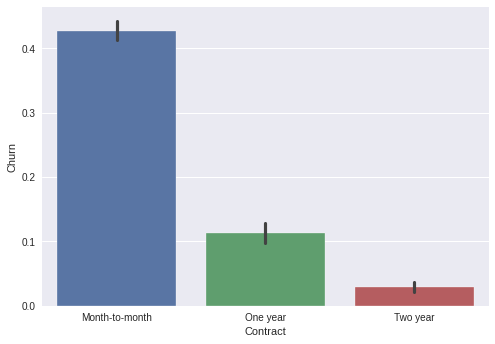

In [1028]:
sns.barplot(x='Contract', y='Churn', data=df)

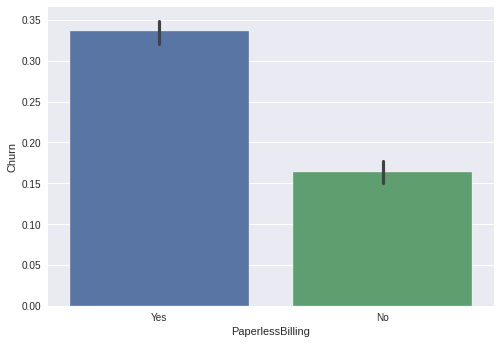

In [1029]:
sns.barplot(x='PaperlessBilling', y='Churn', data=df)

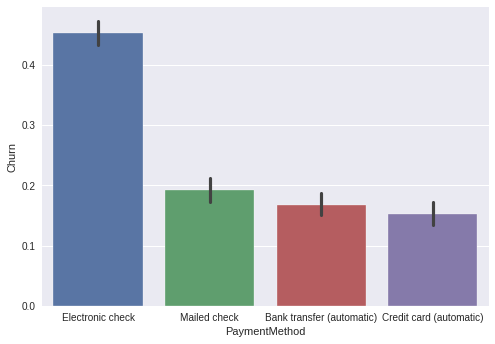

In [1030]:
sns.barplot(x='PaymentMethod', y='Churn', data=df)

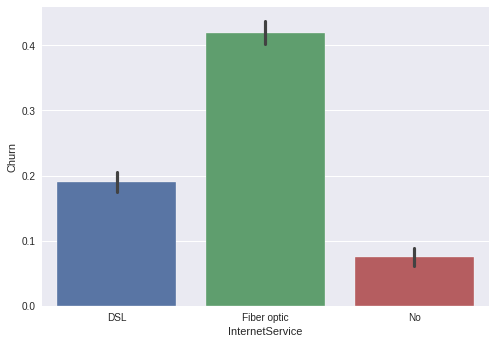

In [1031]:
sns.barplot(x='InternetService', y='Churn', data=df)

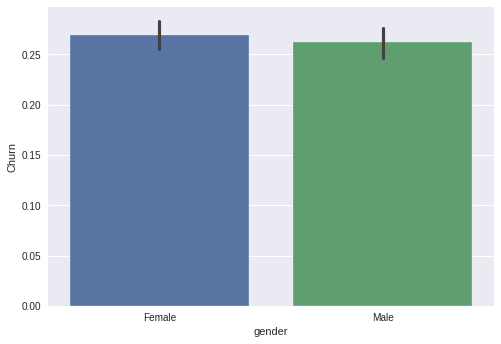

In [1032]:
sns.barplot(x='gender', y='Churn', data=df)

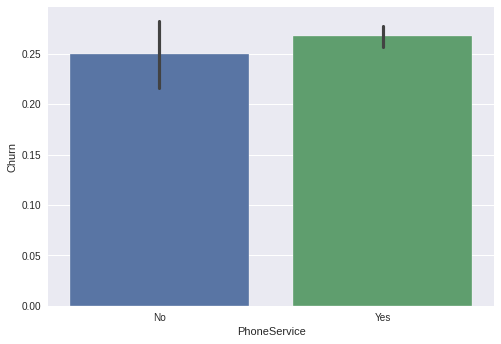

In [1033]:
sns.barplot(x='PhoneService', y='Churn', data=df)

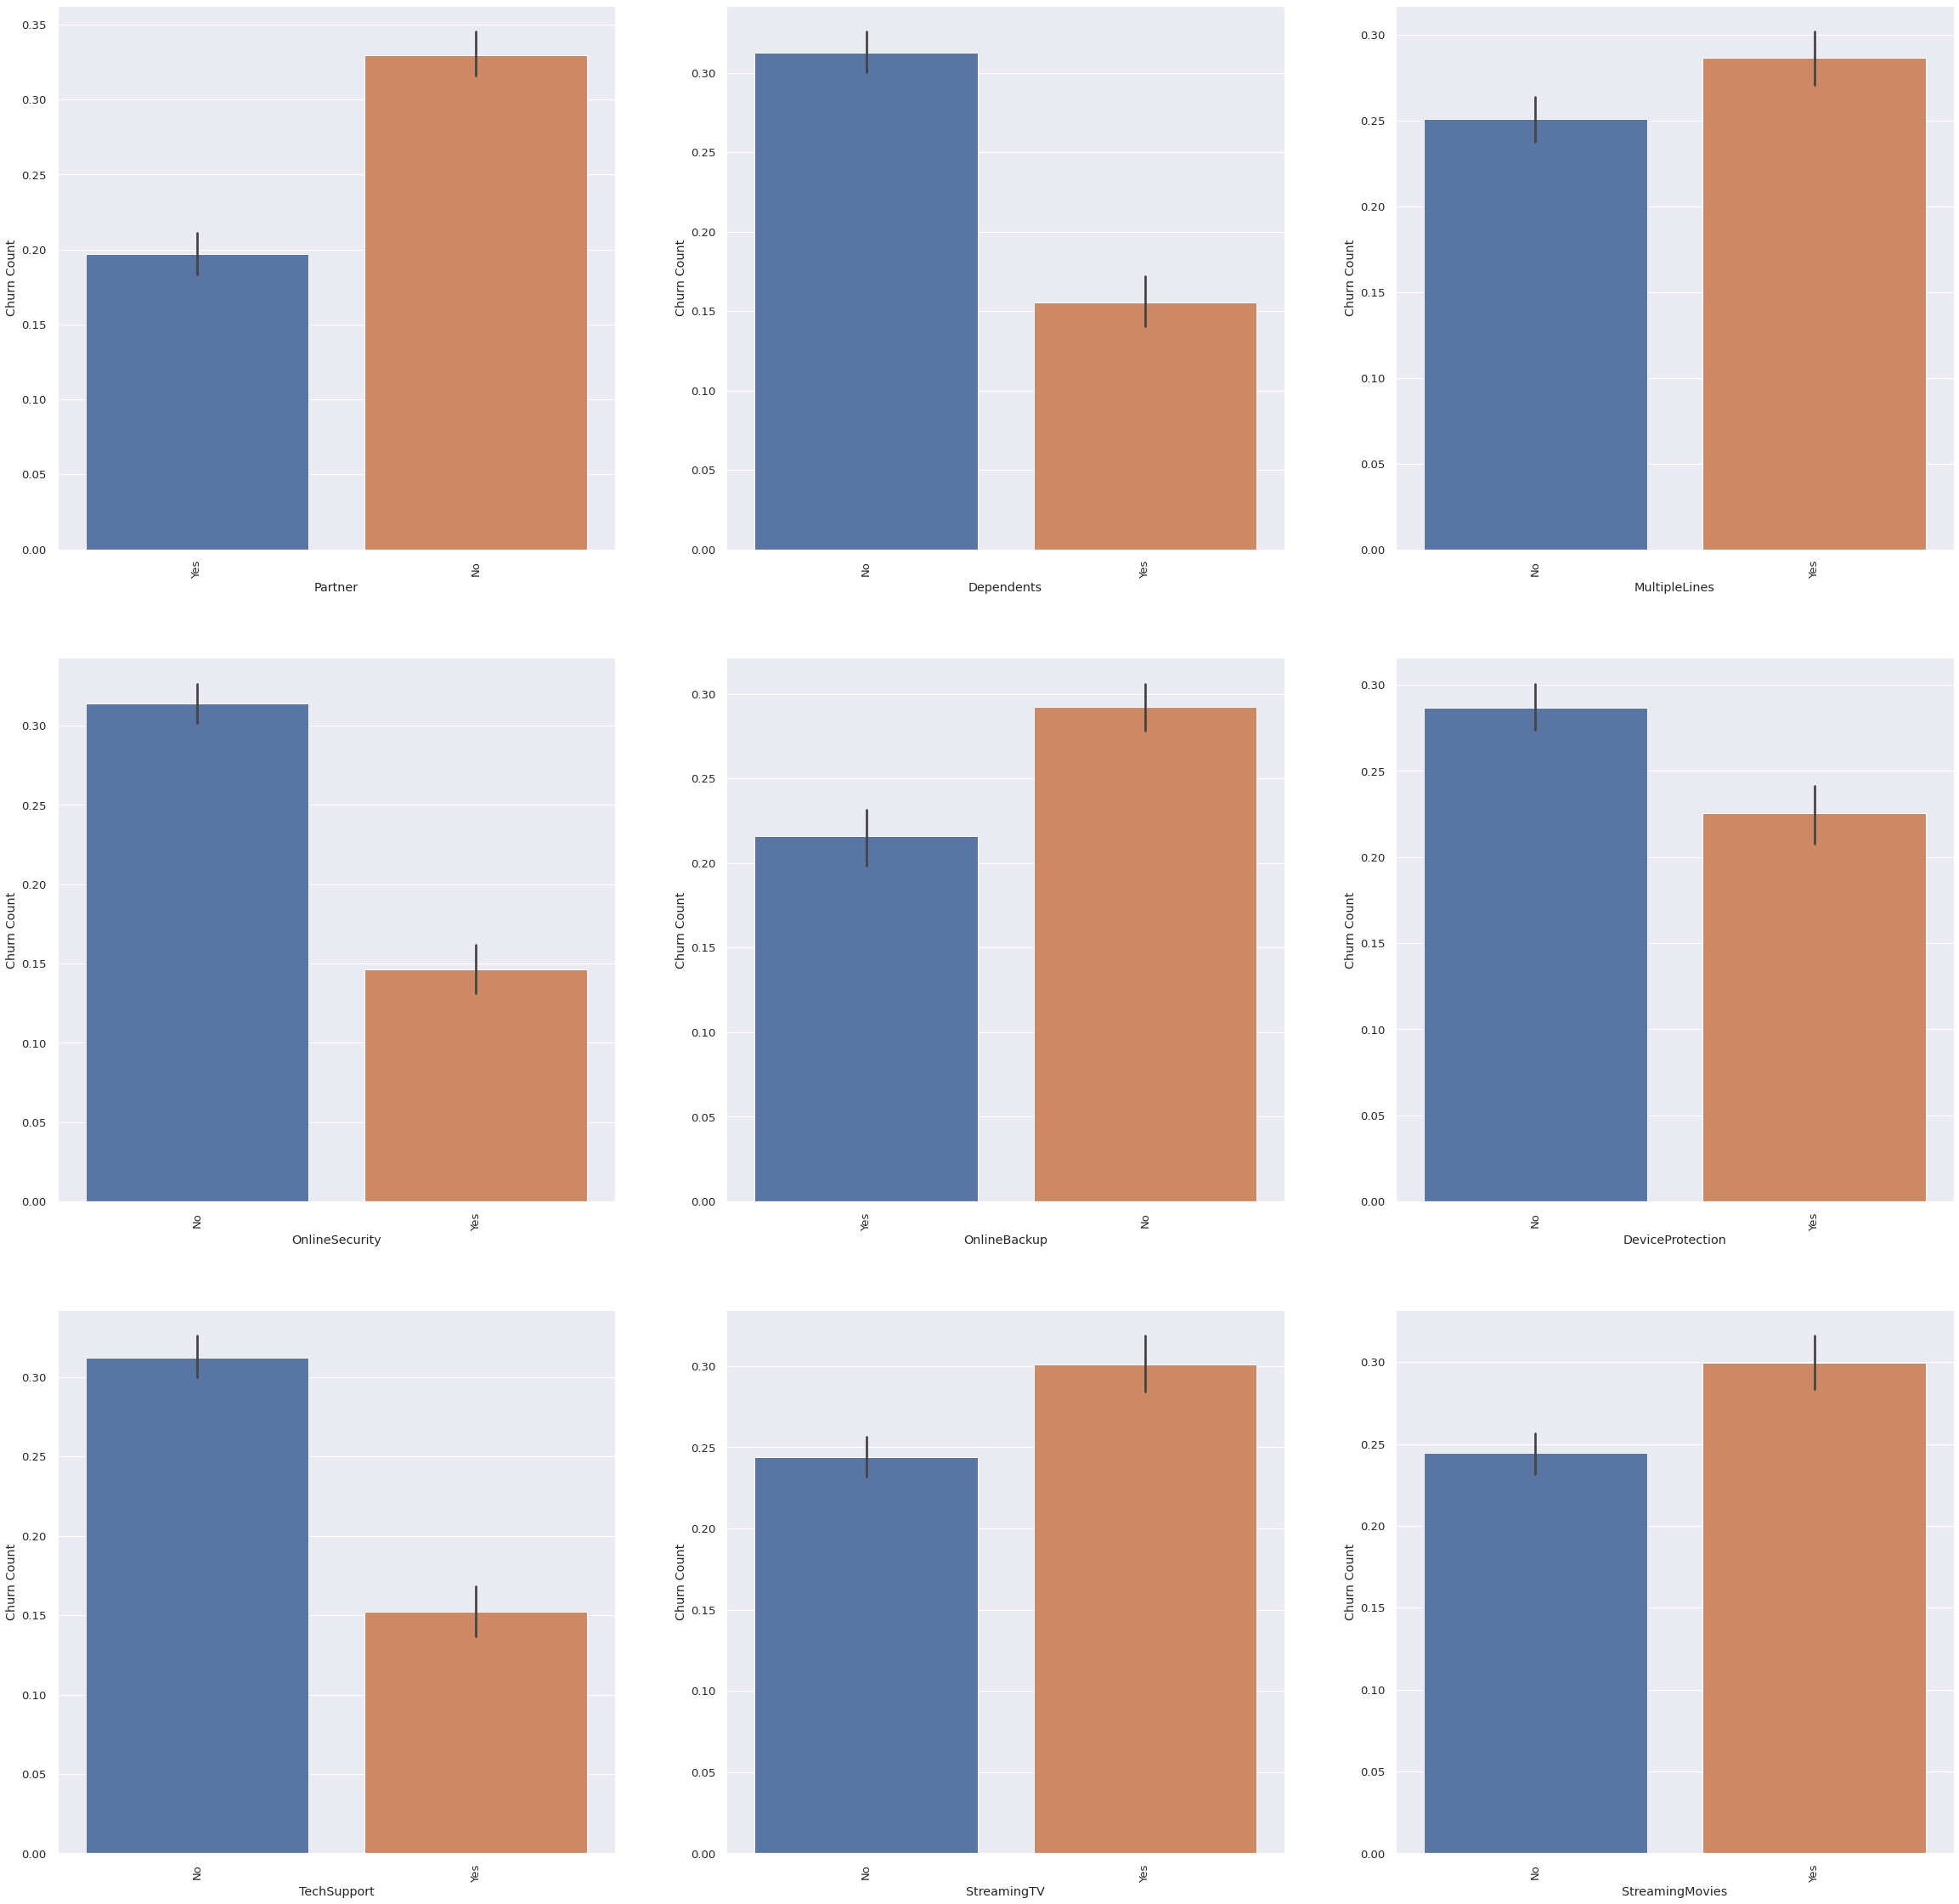

In [1034]:
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=column, y='Churn', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn Count')
    plt.xlabel(f'{column}')

**Answer for Q1**: Your answer here

**Q2: Which payment method has the highest churn rate?**

**Visualization**

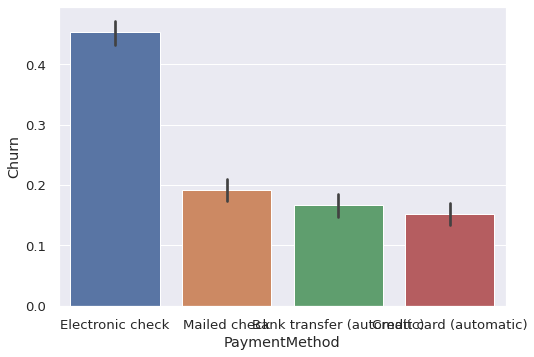

In [1035]:
sns.barplot(x='PaymentMethod', y='Churn', data=df)

**Answer for Q2**: Your answer here

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

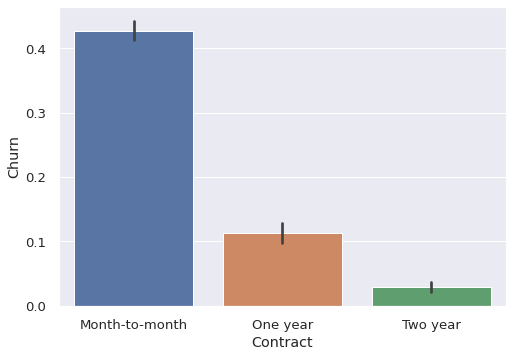

In [1036]:
sns.barplot(x='Contract', y='Churn', data=df)

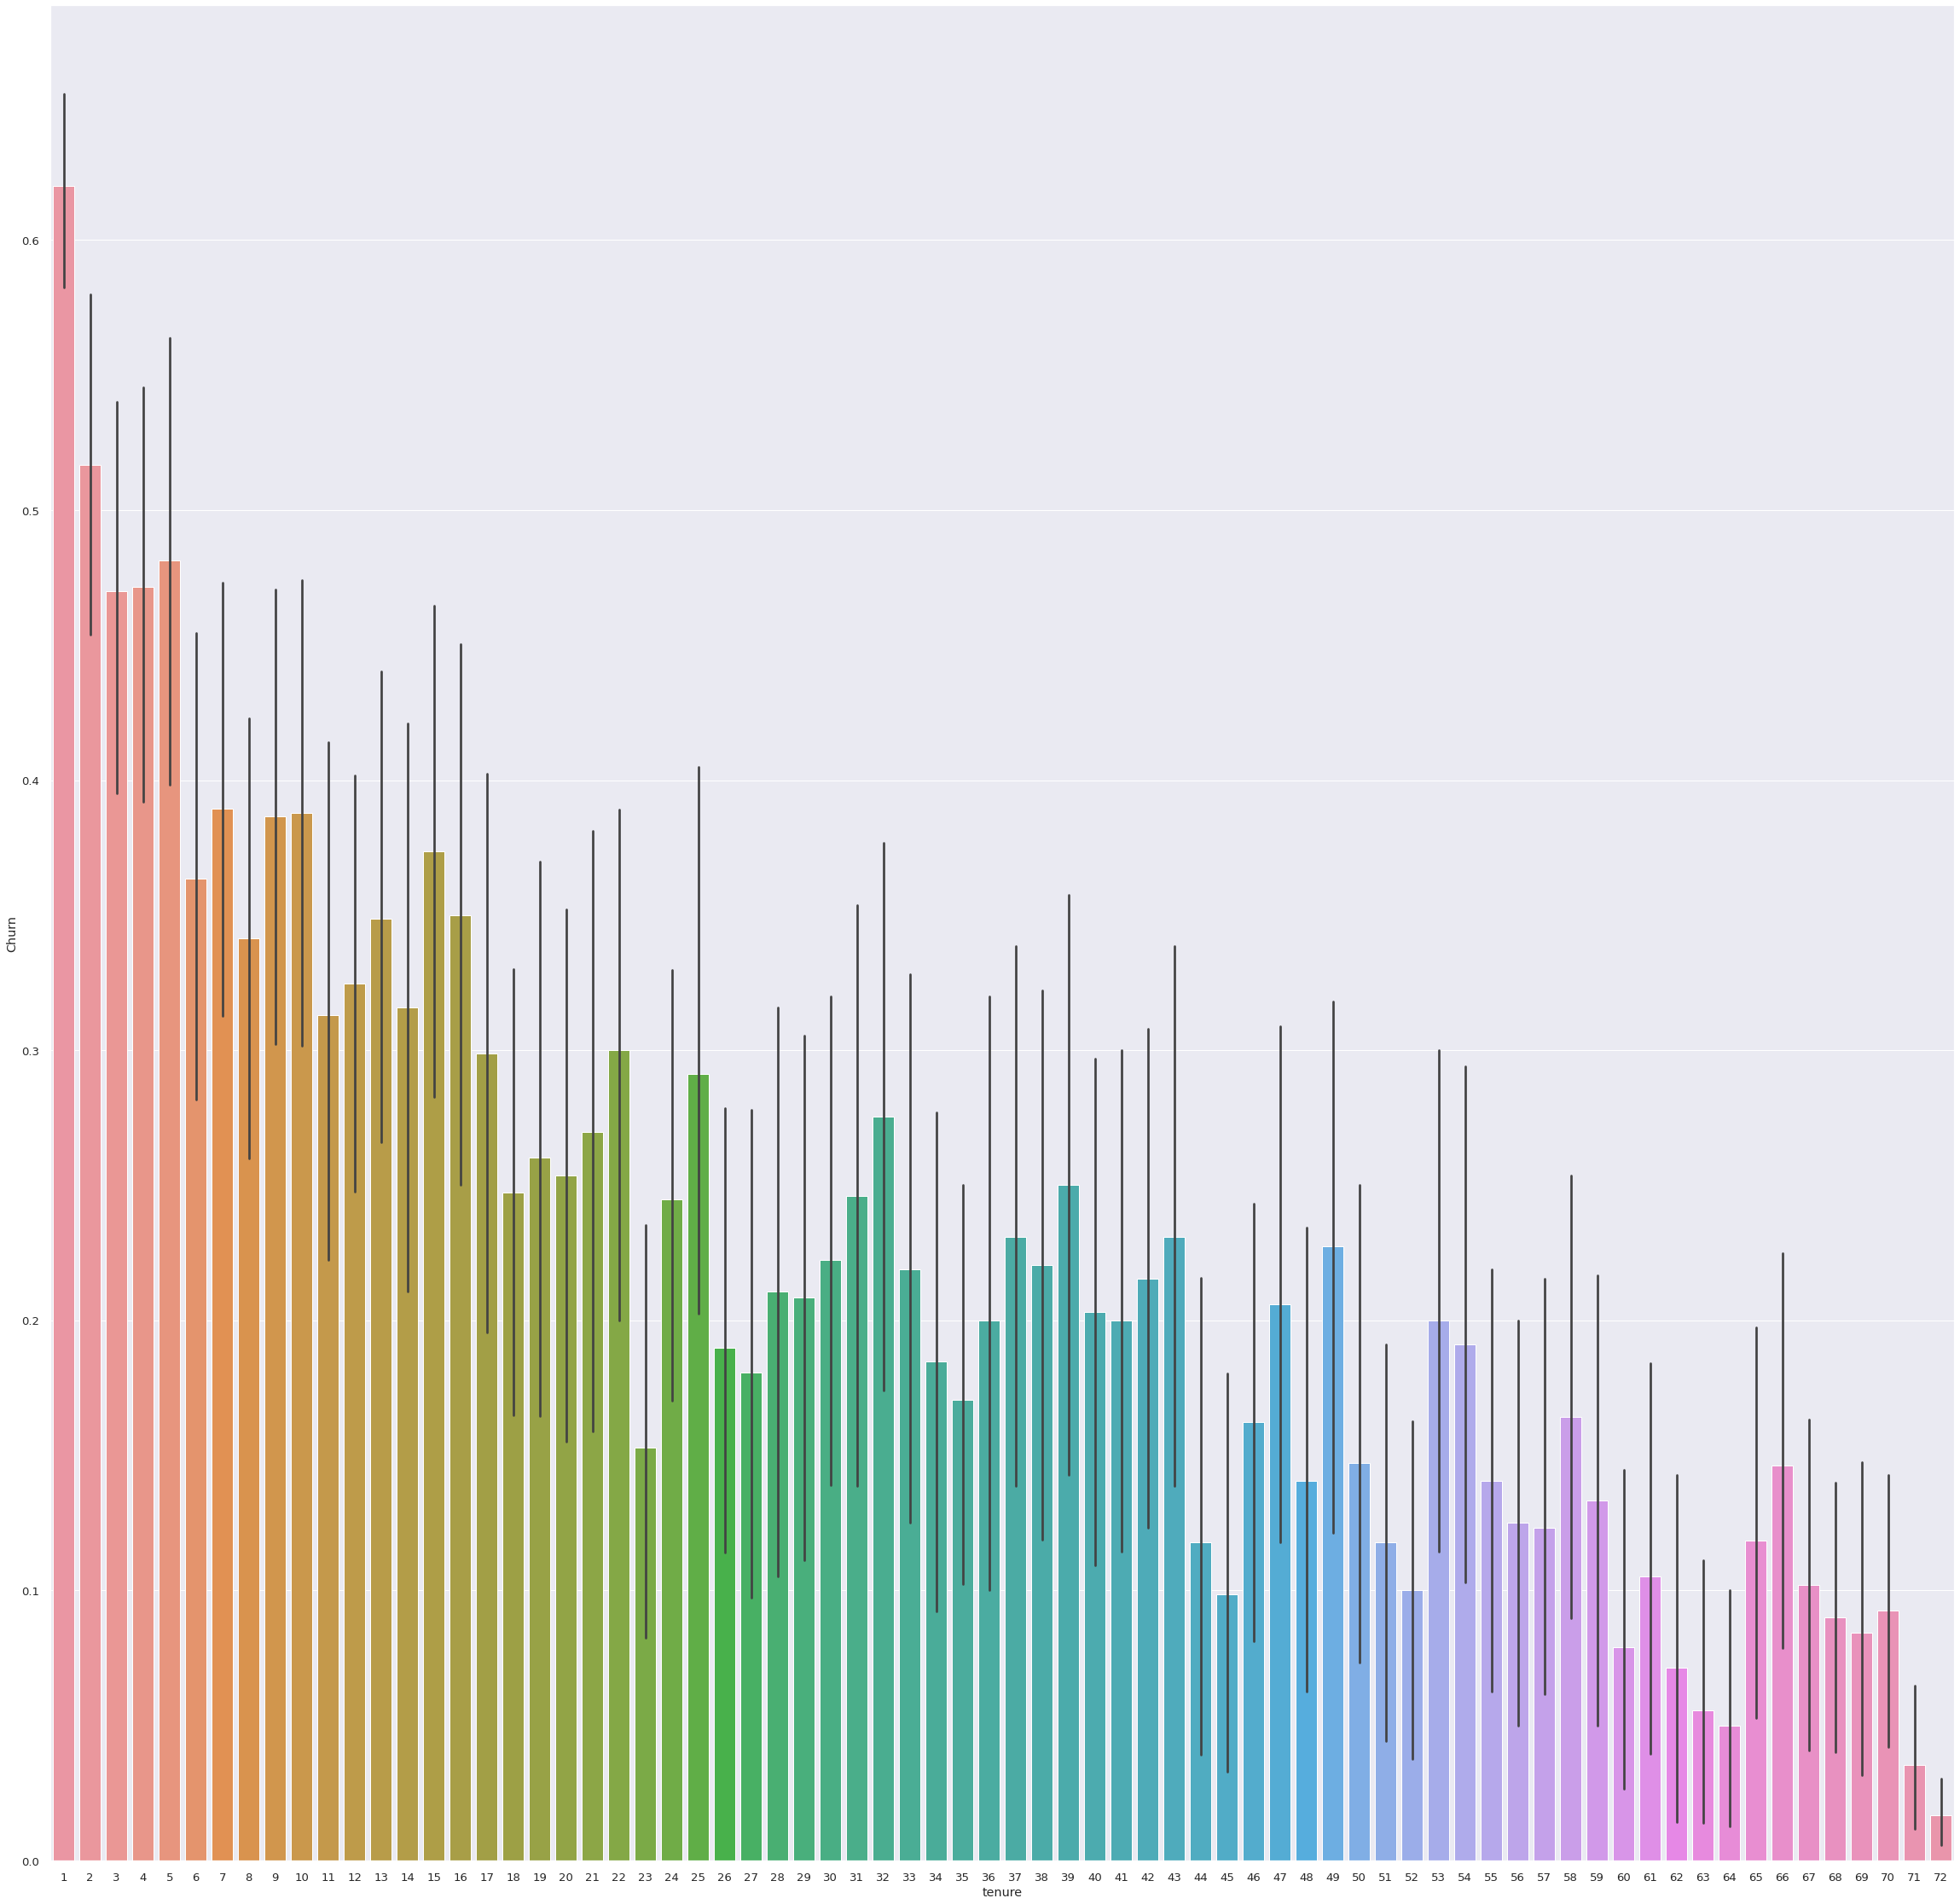

In [1037]:
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))
sns.barplot(x='tenure', y='Churn', data=df)
# ask about the hint (25%,50%,75%)

**Answer for Q3**: Your answer here

## Data Preparation for Modelling

In [1038]:
# need to convert it to numerical to be able to do the decision tree
df_encoded = df.copy()

In [1039]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [1040]:
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

In [1041]:
df['gender'] = df['gender'].astype('category').cat.codes
df['gender']

0       0
1       1
2       1
3       1
4       0
       ..
7027    1
7028    0
7029    0
7030    1
7031    1
Name: gender, Length: 7032, dtype: int8

In [1042]:
df_encoded = pd.get_dummies(df_encoded, columns=categorical_col)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   int64  
 3   TotalCharges                             7032 non-null   float64
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   Partner_No                               7032 non-null   uint8  
 7   Partner_Yes                              7032 non-null   uint8  
 8   Dependents_No                            7032 non-null   uint8  
 9   Dependents_Yes                           7032 non-null   uint8  
 10  PhoneService_No                          7032 no

In [1043]:
#df_encoded.drop(['PaperlessBilling_No', 'StreamingMovies_No','DeviceProtection_No','OnlineBackup_No','OnlineSecurity_No','MultipleLines_No','PhoneService_No','gender_Female','Partner_No','Dependents_No'], axis='columns', inplace=True)
#df_encoded.columns
# should we do this and why

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_0', 'Churn_1'],
      dtype='object')

In [1044]:
df_encoded.drop(['Churn_0'], axis='columns', inplace=True)
df_encoded.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_1'],
      dtype='object')

In [1045]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_1', axis=1)
y = df_encoded['Churn_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [1046]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit( X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [1047]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True) 
graph = graphviz.Source(dot_data)
graph

## Evaluation

## Bonus (Optional)